<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
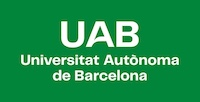
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>104338 - Programació Avançada</b></p>
    <p style="margin: 0; text-align:right;">Grau en Enginyeria de Dades</p>
    <p style="margin: 0; text-align:right;">Universitat Autònoma de Barcelona (UAB)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

# Exercici de programació orientada a l'objecte (POO)

Volem definir una classe `Data` amb atributs per guardar el **dia**, el **mes** i l'**any** d'una data concreta. 

## Constructor

Definim la classe amb el mètode `__init__` per especificar els atributs i inicialitzar-los amb els valors que es passin com a paràmetres:

In [2]:
class Data:
    def __init__(self, dia: int=0, mes: int=0, any: int=0):
        self.dia = dia
        self.mes = mes
        self.any = any

A continuació, es demana:

1. Crear dos objectes de la classe `Data`, un per guardar la data *'01/01/2022'* i l'altra inicialitzada amb els valors per defecte dels atributs definits al constructor.
2. Mostrar per pantalla el dia, el mes i l'any de cadascuna de les dues dates.
3. Seguir amb el *debugger* l'execució del codi.

In [6]:
d1 = Data()
d2 = Data(1, 1, 2022)
print(d1.dia, d1.mes, d1.any)
print(d2.dia, d2.mes, d2.any)

0 0 0
1 1 2022


## Validació de la informació

Afegir a la classe `Data` un mètode `es_valida` que verifiqui si la data és correcta:
- any > 0,
- mes entre 1 i 12, 
- i dia entre 1 i el número de dies del mes corresponent. 

<u>Nota</u>: El mes de febrer heu de tenir en compte si és un any de traspàs o no. Recordeu que els anys de traspàs són tots els divisibles per 4, a excepció dels que siguin divisibles per 100, però no els que siguin divisibles per 400. 

### Atributs estàtics

- `dies_mes` és un atribut estàtic. 
- Els **atributs estàtics** són atributs definits a nivell global de la classe, no dins del mètode `__init__`.
- Els atributs estàtics són compartits per tots els objectes de la classe (una única instància de l'atribut per tots els objectes). 
- Tots els objectes de la classe tenen el mateix valor. 
- Per accedir al valor d'un atribut estàtic s'ha de posar `nom_classe.nom_atribut`.

En aquest exemple podem utilitzar l'atribut estàtic `dies_mes` per guardar el número de dies de cadascun dels mesos. 

Aquesta és una informació que necessita el mètode `es_valida` i que és comuna a tots els objectes de la classe `Data`. 

In [19]:
class Data:
    dies_mes = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    
    def __init__(self, dia=0, mes=0, any=0):
        self.dia = dia
        self.mes = mes
        self.any = any

    def es_traspas(self):
        return (self.any % 4) == 0 and ((self.any % 100) != 0 or (self.any % 400) == 0)

    def es_valida(self):
        dies = Data.dies_mes[self.mes - 1]
        if self.es_traspas() and self.mes == 2:
            dies += 1
        return 1 <= self.mes and self.mes <= 12 and 1 <= self.any and 1 <= self.dia and self.dia <= dies

Comproveu que en el següent exemple, el mètode `es_valida` retorna `True` per les dues primeres dates i `False` per les dues últimes.

In [20]:
d1 = Data(1, 1, 2022)
print(d1.es_valida())
d2 = Data(29, 2, 2020)
print(d2.es_valida())
d3 = Data(29, 2, 2021)
print(d3.es_valida())
d4 = Data(31, 4, 2022)
print(d4.es_valida())

True
True
False
False
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]


### Control d'errors: Excepcions

Python genera automàticament una excepció quan es troba amb una condició inesperada. 

Les excepcions són de tipus diferents segons el tipus d'error que la genera: 
- `SyntaxError`, 
- `ValueError`, 
- `IOError`, 
- ...

En el nostre codi també podem generar excepcions si trobem condicions inesperades utilitzant la instrucció: `raise <tipus_excepció>`

Utilitzant l'estructura `try/except` podem detectar i tractar les excepcions que es produeixen en un bloc del programa (dins del bloc `try`) per identificar i rastrejar els errors, i poder prendre accions correctives de l’error (dins del bloc `except`).

Seguidament, modificarem el constructor de la classe `Data` perquè comprovi si els valors de la data corresponen a una data vàlida. Si la data no és vàlida, ha de generar una excepció de tipus `ValueError`.

El programa següent llegeix per teclat el dia, mes i any i inicialitzi un objecte de tipus `Data` amb els valors llegits per teclat. Ha de mostrar un missatge per pantalla indicant si la data s'ha pogut inicialitzar correctament o no (utilitzem `try/except` per capturar l'excepció que es genera si la data no és vàlida).

In [21]:
class Data:
    dies_mes = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    
    def __init__(self, dia=1, mes=1, any=0):
        self.dia = dia
        self.mes = mes
        self.any = any
        if not self.es_valida():
            raise ValueError

    def es_traspas(self):
        return (self.any % 4) == 0 and ((self.any % 100) != 0 or (self.any % 400) == 0)

    def es_valida(self):
        dies_mes = Data.dies_mes[self.mes - 1]
        if self.es_traspas() and self.mes == 2:
            dies_mes += 1
        return 1 <= self.mes and self.mes <= 12 and 1 <= self.any and 1 <= self.dia and self.dia <= dies_mes

In [22]:
dia = int(input('Dia: '))
mes = int(input('Mes: '))
any = int(input('Any: '))

try:
    d = Data(dia, mes, any)
    print("Data correcta")
except:
    print("Data no vàlida")

Dia:  1
Mes:  1
Any:  2000


Data correcta


### Control d'errors: Assercions

Les **assercions** són una alternativa per la generació d'excepcions quan volem comprovar fàcilment les condicions que han de complir alguns valors per una execució correcta del programa. 

La sintaxi d'una asserció és:
    
    assert <condició>, <missatge>
    
- La condició permet posar qualsevol comparació vàlida que comprovi si el valor és correcte o no. 
- Si la condició és **falsa** genera una excepció de tipus `AssertionError` que es pot capturar amb `try/except` com qualsevol altra excepció. 
- El missatge permet donar informació addicional sobre l’error que s’ha produït de la forma següent:

    ```
    try
        ...
    except AssertionError as e:
        print(e)
    ```
        

A continuació, repetirem l'exercici anterior, però en aquest cas substituirem l'excepció de tipus `ValueError` per una asserció.

In [6]:
class Data:
    dies_mes = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    
    def __init__(self, dia=1, mes=1, any=0):
        self.dia = dia
        self.mes = mes
        self.any = any
        assert self.es_valida(), 'Data no vàlida'

    def es_traspas(self):
        return (self.any % 4) == 0 and ((self.any % 100) != 0 or (self.any % 400) == 0)

    def es_valida(self):
        dies_mes = Data.dies_mes[self.mes - 1]
        if self.es_traspas() and self.mes == 2:
            dies_mes += 1
        return 1 <= self.mes and self.mes <= 12 and 1 <= self.any and 1 <= self.dia and self.dia <= dies_mes

In [8]:
dia = int(input('Dia: '))
mes = int(input('Mes: '))
any = int(input('Any: '))

try:
    d = Data(dia, mes, any)
    print("Data correcta")
except AssertionError as e:
    print(e)

Dia:  30
Mes:  2
Any:  2020


Data no vàlida


### Sobrecàrrega d'operadors i mètodes

Redefinim (sobrecarreguem) el mètode *`__str__`* de la classe `Data` per poder mostrar per pantalla la data en format *DD/MM/YYYY*. 

Utilitzem `str.format` per mostrar la data en el format desitjat:
- [exemples str.format](https://www.geeksforgeeks.org/python-string-format-method/)
- [especificacions str.format](https://www.w3schools.com/python/ref_string_format.asp)

In [23]:
class Data:
    dies_mes = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    
    def __init__(self, dia=1, mes=1, any=0):
        self.dia = dia
        self.mes = mes
        self.any = any
        assert self.es_valida(), 'Data no vàlida'

    def es_traspas(self):
        return (self.any % 4) == 0 and ((self.any % 100) != 0 or (self.any % 400) == 0)

    def es_valida(self):
        dies_mes = Data.dies_mes[self.mes - 1]
        if self.es_traspas() and self.mes == 2:
            dies_mes += 1
        return 1 <= self.mes and self.mes <= 12 and 1 <= self.any and 1 <= self.dia and self.dia <= dies_mes
    
    def __str__(self):
        return '{:02d}/{:02d}/{:04d}'.format(self.dia, self.mes, self.any)

In [24]:
d = Data(1, 2, 2022)
print(d)

01/02/2022


Finalment, sobrecarreguem els operadors `<` i `==` per poder comparar dues dates.

Us recomanem seguir l'execució amb el *debugger*.

In [4]:
class Data:
    dies_mes = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    
    def __init__(self, dia=1, mes=1, any=0):
        self.dia = dia
        self.mes = mes
        self.any = any
        assert self.es_valida(), 'Data no vàlida'

    def es_traspas(self):
        return (self.any % 4) == 0 and ((self.any % 100) != 0 or (self.any % 400) == 0)

    def es_valida(self):
        dies_mes = Data.dies_mes[self.mes - 1]
        if self.es_traspas() and self.mes == 2:
            dies_mes += 1
        return 1 <= self.mes and self.mes <= 12 and 1 <= self.any and 1 <= self.dia and self.dia <= dies_mes
    
    def __str__(self):
        return '{dia:02d}/{mes:02d}/{any:04d}'.format(dia = self.dia, mes=self.mes, any=self.any)
    
    def __lt__(self, data):
        menor = False
        if self.any < data.any:
            menor = True
        elif self.any == data.any:
            if self.mes < data.mes:
                menor = True
            elif self.mes == data.mes:
                menor = (self.dia < data.dia)
        return menor
    
    def __eq__(self, data):
        return self.any == data.any and self.mes == data.mes and self.dia == data.dia

### Composició de classes

És la **utilització de classes ja existents com a atributs** dins d’una altra classe. 

Crearem una classe `Llibre` per guardar les dades dels llibres que es guarden en una biblioteca. 

Per cada llibre hem de saber:
- el títol, 
- l'autor 
- i si està prestat o no. 

Si ho està hem de poder saber la data en què es va fer el préstec. 

Crear la classe només amb el constructor que inicialitzi el llibre amb el títol i l'autor i com a no prestat. 

In [9]:
class Llibre:
    def __init__(self, titol = "", autor = ""):
        self.titol = titol
        self.autor = autor
        self.prestat = False
        self.data_prestec = Data()

Per concloure aquest exercici de composició de classes, afegirem a la classe `Llibre` un mètode `presta` que marqui el llibre com a prestat amb la data que se li passa com a paràmetre per assegurar la funcionalitat següent:

- S'ha de comprovar que la data que es passa sigui una data vàlida i que el llibre no estigui ja prestat. 
- Si no es compleix alguna d'aquestes dues condicions s'ha de generar una asserció. 

In [9]:
class Llibre:
    def __init__(self, titol = "", autor = ""):
        self.titol = titol
        self.autor = autor
        self.prestat = False
        self.data_prestec = Data()
    
    def presta(self, data):
        assert data.es_valida(), 'Data de préstec no vàlida'
        assert not self.prestat, 'Llibre ja prestat'
        self.prestat = True
        self.data_prestec = data